In [1]:
import os 
import random

import matplotlib.pyplot as plt

import numpy as np
from scipy.interpolate import interp1d

from flystim.util import latency_report

In [36]:
def simulate_latency(display_fps, camera_fps, mean_latency, std_latency, min_sync_freq, max_sync_freq, length=30):
    """ Generate simulated latency traces
    
    Args:
      display_fps
      camera_fps
      mean_latency
      std_latency
      min_sync_freq
      max_sync_freq
      length
      
    Returns:
      display_frame_times
      display_sync
      camera_frame_times
      camera_sync
    """
    min_toggle_freq = min_sync_freq / 2
    max_toggle_freq = max_sync_freq / 2
    
    display_frame_times = np.linspace(0, length, display_fps * length)
    display_sync = []    
    
    dwell = 0
    sync = 0    
    last_toggle = 0
    
    for frame_time in display_frame_times:
        elapsed = frame_time - last_toggle
        
        if elapsed > dwell:
            sync = 1 - sync
            last_toggle = frame_time
            dwell = random.uniform(1 / max_toggle_freq, 1 / min_toggle_freq)
            
        display_sync.append(sync)
        
    sync_trace = interp1d(display_frame_times, display_sync)
    
    camera_frame_times = []
    camera_sync = []
    
    frame_time = 0
    
    while frame_time < length:
        camera_frame_times.append(frame_time)
        camera_sync.append(sync_trace(frame_time))
        
        frame_time += random.uniform((1 / camera_fps) - std_latency, (1 / camera_fps) + std_latency)
        
    camera_frame_times = np.array(camera_frame_times) + mean_latency
        
    return display_frame_times, display_sync, camera_frame_times, camera_sync
        

In [45]:
fs_timestamp, fs_sync, ft_timestamp, ft_sync = simulate_latency(120, 240, .05, .0005, 10, 100)

In [46]:
latency_report(fs_timestamp, fs_sync, ft_timestamp * 1000, ft_sync)

     statistic       |     flystim      |     fictrac     
      mean fps       |     119.9667     |     240.0827    
------------------------------------------------------------
 mean frame length   |      0.0083      |      0.0042     
------------------------------------------------------------
  std frame length   |      0.0000      |      0.0003     
------------------------------------------------------------
  min frame length   |      0.0083      |      0.0037     
------------------------------------------------------------
  max frame length   |      0.0083      |      0.0047     
------------------------------------------------------------
Globally optimal lag: 50.0 ms


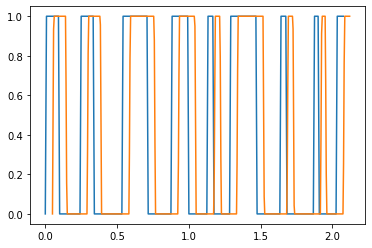

In [51]:
plt.plot(fs_timestamp[:250], fs_sync[:250])
plt.plot(ft_timestamp[:500], ft_sync[:500])